**Table of contents**<a id='toc0_'></a>    
- [Обработка данных и Topic Modeling](#toc1_)    
  - [Импорт библиотек](#toc1_1_)    
  - [Профили](#toc1_2_)    
  - [Посты](#toc1_3_)    
  - [Реакции](#toc1_4_)    
  - [Обработка данных](#toc1_5_)    
  - [Лемманизация текста](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Обработка данных и Topic Modeling](#toc0_)

## <a id='toc1_1_'></a>[Импорт библиотек](#toc0_)

In [1]:
import pandas as pd
import json
import re

import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem
from wordcloud import WordCloud

import matplotlib.pyplot as plt

from  pandarallel import pandarallel
pandarallel.initialize(progress_bar=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oleg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import swifter

with open('total_posts.json', 'r') as posts_data:
    posts = json.load(posts_data)
posts

with open('total_profiles.json', 'r') as profiles_data:
    profiles = json.load(profiles_data)
profiles

with open('total_reactions.json', 'r') as reactions_data:
    reactions = json.load(reactions_data)
reactions

## <a id='toc1_2_'></a>[Профили](#toc0_)

In [28]:
profiles_main = pd.read_json('total_profiles.json', orient='index')
print(profiles_main.shape)
profiles.head()

(199, 8)


,name,city,connections,role,company,experience,employment_type,skills
nurlan-isbulaev-34bb211a3,Nurlan Isbulaev,Moscow,500+,Backend Developer,Доброзайм,3.92,Full-time,"[JSON, AutoCAD, PHP, Технология строительного ..."
maria-terenteva,Maria Terenteva,Moscow,500+,Frontend Developer | Angular,"LLC ""ROBIN""",3.67,Full-time,"[Git, HTML, Отчетность, Ведение переговоров, Д..."
руслан-гусейнов-091858186,Руслан Гусейнов,Russia,500+,Frontend Developer,OZON.ru,3.67,Full-time,"[Vuex, WebSockets, ООП, git, TypeScript, Gulp,..."
kirill-gonin,Kirill Gonin,Russia,180,Full Stack Developer JavaScript,«Сервисный центр Транстелематика»,2.75,Full-time,"[React, Jest, Material-UI, Express, CSS, HTML,..."
alexey-sergienko,Alexey Sergienko,Moscow,168,Software Developer,OZON.ru,9.83,Full-time,"[Электроника, Git, Vue.js, HTML, electron , Re..."


In [26]:
profiles_add = pd.read_json('profiles_developer_kristina_86.json', orient='index')
print(profiles_add.shape)
profiles_add.head(3)

(86, 8)


,name,city,connections,role,company,experience,employment_type,skills
anastasiia-miagkikh-b118a2168,Anastasiia Miagkikh,St Petersburg,138,Frontend Developer,Северсталь-Инфоком,4.08,Full-time,"[Photoshop, JavaScript, Redux, Matlab, React]"
mirkadev,Vladimir Mironov,Mordovia,132,Middle NodeJS Developer (backend only),SimbirSoft,4.58,unknown,"[Socket.IO, Koa.js, JavaScript, PostgreSQL, Mo..."
elena-vidyakina-2b877990,Elena Vidyakina,Russia,61,Senior backend developer,Yandex Eats,12.50,unknown,"[Angular, .NET, Unit Testing, C#, PowerDesigne..."


In [27]:
profiles_senior = pd.read_json('profiles_developer_senior.json', orient='index')
print(profiles_senior.shape)
profiles_senior.head(3)

(86, 8)


,name,city,connections,role,company,experience,employment_type,skills
silvansky,Valentine Silvansky,Moscow,307,Senior Developer,Songsterr,15.83,unknown,"[JavaScript, Subversion, Carbon, Objective-C, ..."
vyacheslav-kruglov-2279421a5,Vyacheslav Kruglov,Russia,109,Senior Golang Developer,Yandex,4.50,Full-time,"[SQL, Golang , go, Git]"
denis-k-0a44327b,Denis K.,Moscow,500+,Senior Golang Developer,KASPERSKY LABS LIMITED,5.50,Full-time,"[docker, API Gateways, Google API, Hyperledger..."


Объединим датафреймы

In [31]:
profiles = pd.concat([profiles_main, profiles_add, profiles_senior])
print(profiles.shape)

(371, 8)


## <a id='toc1_3_'></a>[Посты](#toc0_)

In [32]:
posts_main = pd.read_json('total_posts.json', orient='index')
posts_main

,0,1,2,3,4,5,6,7,8,9
nurlan-isbulaev-34bb211a3,"🔥 11 сервисов на базе ИИ ,которые помогут прок...",🔥 Если вы в поисках удаленной работы или допол...,Как Ваш профиль LinkedIn виден со стороны рекр...,"🎯 𝗦𝗤𝗟 𝗭𝗲𝗿𝗼 𝘁𝗼 𝗛𝗲𝗿𝗼 Notes 𝘄𝗶𝘁𝗵 𝗠𝗶𝗻𝗱𝗺𝗮𝗽 📚SQL, or...",Rest API and HTTP notes.A REST API (Representa...,Best ChatGPT Alternatives to finish hours of w...,Землетрясения напомнили кто мы Мы все маленьк...,С момента начала моей работы в компании Доброз...,None,None
maria-terenteva,None,None,None,None,None,None,None,None,None,None
руслан-гусейнов-091858186,None,None,None,None,None,None,None,None,None,None
kirill-gonin,Всем привет!Собеседование на английском языке ...,Я только что получил(а) значок за навык «React...,Я только что получил(а) значок за навык «JavaS...,None,None,None,None,None,None,None
alexey-sergienko,Я только что получил(а) значок за навык «Разра...,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
александр-винокуров-480148140,None,None,None,None,None,None,None,None,None,None
максим-пигалов-0154441aa,None,None,None,None,None,None,None,None,None,None
advanture,None,None,None,None,None,None,None,None,None,None
grigoriy-pogrebnyak-929691119,None,None,None,None,None,None,None,None,None,None


In [34]:
posts_add = pd.read_json('posts_developer_kristina_86.json', orient='index')
posts_add

,0,1,2,3,4,5,6,7,8,9
anastasiia-miagkikh-b118a2168,None,None,None,None,None,None,None,None,None,None
mirkadev,I've broken a new record for touch typing (onl...,None,None,None,None,None,None,None,None,None
elena-vidyakina-2b877990,None,None,None,None,None,None,None,None,None,None
biluta,None,None,None,None,None,None,None,None,None,None
jjestyyy,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
kirill-lebedev-850b39233,None,None,None,None,None,None,None,None,None,None
albert-iskhakov-27842238,None,None,None,None,None,None,None,None,None,None
daniil-kartashev-22933014a,None,None,None,None,None,None,None,None,None,None
artem-shumilov-086498196,None,None,None,None,None,None,None,None,None,None


In [33]:
posts_senior = pd.read_json('posts_developer_senior.json', orient='index')
posts_senior

,0,1,2,3,4,5
silvansky,None,None,None,None,None,None
vyacheslav-kruglov-2279421a5,None,None,None,None,None,None
denis-k-0a44327b,None,None,None,None,None,None
denis-naletov,None,None,None,None,None,None
anastasiia-sharabanova-101002172,None,None,None,None,None,None
...,...,...,...,...,...,...
d-batmanov,None,None,None,None,None,None
ideyniy,None,None,None,None,None,None
andreysimfi,"Всем привет, нахожусь в поиске своей команды, ...",В нашей разработке мы используем RequireJS. Но...,В предыдущей статье Использование Component в ...,В статье Менеджеры Js/Css библиотек мы рассмат...,В проекте необходимо реализовать дату в виде “...,"Недавно вышла OS X El Capitan, давайте обновим..."
chernyy-dmitriy-5129451a1,None,None,None,None,None,None


Объединим датафреймы

In [35]:
posts = pd.concat([posts_main, posts_add, posts_senior])
print(posts.shape)

(371, 10)


## <a id='toc1_4_'></a>[Реакции](#toc0_)

In [37]:
reactions_main = pd.read_json('total_reactions.json', orient='index')
reactions_main

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
nurlan-isbulaev-34bb211a3,"🔥 11 сервисов на базе ИИ ,которые помогут прок...",#opentowork #recruiter Всем привет! Приступаю ...,🔥 Если вы в поисках удаленной работы или допол...,Буду благодарна за репосты и лайки:),Simple example ✌️Backend - APIs - Frontend 🔥 F...,My biggest problem :),#chatgpt,(Обычный профессионал - VS - АйТи профессионал),JavaScript Array Methods CheatSheet 📍This will...,"Клянусь, с сегоняшним наймом, создаётся впечат...",...,None,None,None,None,None,None,None,None,None,None
maria-terenteva,Me being a parent:,Всем привет!Активно ищу работу/стажировку/подр...,#it #humor #memes,Всем привет 👋Linkedln сообщество сейчас активн...,"Ok, Google, сливаю суть: #BardAI сейчас исполь...","Новые сотрудники, GameMod ищет вас 👀 Возвращаю...",Hi everyone - I am looking for a new role and ...,"❗ТОП-15 ❗ РЕСУРСОВ, КОТОРЫЕ МОГУТ ПОМОЧЬ НЕ ТО...",🍃 Specialize in MongoDB to build your applicat...,Life is not a fair game 🥺 That is exactly how ...,...,"The more you know, the more you know that you ...",Loving these AI generated pictures of the Coro...,Employers wants young candidates with deep exp...,When I interviewed someone and their laptop......,https://lnkd.in/guxNaeUc#Smart,https://lnkd.in/g-StFrjNSome lovely vintage in...,None,None,None,None
руслан-гусейнов-091858186,#humor #it,"Я #нанимаю. Знаете людей, которых это может за...",This story is about my path to IT.I had some t...,Напомню один из основополагающих принципов наш...,"А у вас как дела, цсс инженеры и хтмл архитект...","Здравствуйте, я в поиске новой карьерной возмо...",Mama I made it #google .... first day at work,None,None,None,...,None,None,None,None,None,None,None,None,None,None
kirill-gonin,Вы обращали внимание как здорово и быстро разв...,Всем привет! Сейчас я активно ищу работу Front...,В августе 2022-го года я переехал жить на Кипр...,"С удовольствием сообщаю, что я начинаю работу ...",Мой путь в IT начинался вот с такой обстановки...,"Предлагаю вашему вниманию краткую, но очень уд...",Very ready to expand my knowledge and dive int...,За 4 года в карьерном консультировании только ...,#hr #headhunter #recruiter,My roadmap LeetCode ✌🏿Мне нужна была огромная ...,...,None,None,None,None,None,None,None,None,None,None
alexey-sergienko,Why is PR one of the crucial areas to pay atte...,Why use SaaS for engineers? It is the question...,"С удовольствием сообщаю, что я начинаю работу ...",Hey! We’ve developed a new amazing online plat...,I’m happy to share that I’m starting a new pos...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
александр-винокуров-480148140,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
максим-пигалов-0154441aa,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
advanture,"Действительно, делов-то 😁",I’m happy to share that I’m starting a new pos...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
grigoriy-pogrebnyak-929691119,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [38]:
reactions_add = pd.read_json('reactions_developer_kristina_86.json', orient='index')
reactions_add

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
anastasiia-miagkikh-b118a2168,Houdini ocean#oceanstorm #houdini,My new employee asked me one day for time off....,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
mirkadev,If you meet me you'll see that I'm fast. At ev...,It's my first day of a new jobWish me good luck 🍀,"Здравствуйте, я в поиске новой карьерной возмо...","Не прошло и двадцати с лишним лет, как OZON.ru...",I am extremely happy and grateful to say that ...,Всем привет! Мой крёстный сегодня был вынужден...,We're thrilled to be back on the streets of La...,"Today, we’re thrilled to announce the latest a...",Open source technology is a critical part of o...,Our self-driving car first started operating o...,...,None,None,None,None,None,None,None,None,None,None
elena-vidyakina-2b877990,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
biluta,"Я умею объяснять бизнесу что айтишники не ""о*е...",I’m happy to share that I’m starting a new pos...,Если есть стремление сделать свой бизнес лучше...,I’m happy to share that I’m start personal con...,"Hello, everyone!I will be in Oslo until August...",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
jjestyyy,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kirill-lebedev-850b39233,"Хочу устроиться разработчиком в MAANG (Meta, A...",#login #flutter #flutterdeveloper #uiux #dart ...,Which UIis Better?Feedback's Appreciate#ux #ui...,How much Experiance do you have?#experience,"2 минуты сдать оборудование, 1 минуту подписат...","Всем привет! Я уже рассказывал вам, что моя до...",Оффер в $2800/месяц В декабре 2021 года я полу...,None,None,None,...,None,None,None,None,None,None,None,None,None,None
albert-iskhakov-27842238,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
daniil-kartashev-22933014a,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
artem-shumilov-086498196,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [39]:
reactions_senior = pd.read_json('reactions_developer_senior.json', orient='index')
reactions_senior

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
silvansky,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
vyacheslav-kruglov-2279421a5,Привет!Меня зовут Максим Говоров. Вот уже 10 л...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
denis-k-0a44327b,Today I started a new job at Apple!☁️,Do you agree?,Progress 👍,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
denis-naletov,LAB SP is hosting Развитие решений ЛАБ СП: нов...,I’m happy to share that I’m starting a new pos...,— Ты что читаешь? — Тарковского. Это стихи Арс...,It might be hard to investigate cache issue in...,You could call us the original start-up. 🚀 On ...,"С удовольствием сообщаю, что я начинаю работу ...",It was an incredible journey and my first proj...,Infinity coffee table design,Winter campus greetings and have a great 3rd A...,TissueGUARD is excited to announce the acquisi...,A flying visit to the construction site of the...,Christoph Behrendt’s career at SAP has been a ...,I don't care that she fell asleep. I want to w...,"And again, the campus is covered in a white co...",We need to ensure our enterprise software is e...,🎉 Some exciting personal news: After 5 amazing...,I am happy to stay at IPF for the next two yea...,Thanks SAP ! Pancake Saturday it is! #sap #sa...,Beautiful Peru.,Did you know today is #MoleDay - an unofficial...
anastasiia-sharabanova-101002172,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d-batmanov,Август 2017: переехал из не самого большого си...,"Hello Slack creators, Thank you for warning me...",🌱15-я экоакция «Чистые Уды»Речные котики в стр...,I am inspired to join the Yandex team! The fir...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
ideyniy,Привет! Я в линкедин относительно недавно и сн...,"Честно, я в шоке... Сделал 2 красивых поста. С...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
andreysimfi,Появилось желание поделиться своими размышлени...,Странные люди,"Работодатели опаздывают не меньше, чем кандида...",Немного разбавим ленту хорошими новостями (вос...,Про пресловутые письма с отказом по итогам тес...,Тестовые задания никому не нужны. Ни рекрутера...,Когда защита от спама все-таки не сработала 🤷‍...,"«Лучше гор могут быть только горы,На которых е...",Вопросы для оценки вашего места работы.1. Перс...,Удаленщики часто эффективней офисных сотрудник...,"Дорогие и уважаемые рекрутеры, в 2020 желаю ва...","Ты стал взрослым в тот момент, когда вычеркнул...","Уважаемые наниматели!Если вы ищете:- Java, Pyt...",Да что вы знаете о безопасности)#programming #...,WANTED: Backend DeveloperRELOCATION: to Amster...,None,None,None,None,None
chernyy-dmitriy-5129451a1,Рады приветствовать вас в нашей новой рубрике ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


Объединим датафреймы

In [40]:
reactions = pd.concat([reactions_main, reactions_add, reactions_senior])
print(reactions.shape)

(371, 30)


## <a id='toc1_5_'></a>[Обработка данных](#toc0_)

Pipeline обрабоки данных.
- Отбор релевантных постов
- Очистка текстов 
- Лемманизация 
- Топик

In [7]:
def clean_text(text):
    #import re при использовании pandarallel
    try:
        text = text.lower()
        text = re.sub('[^\w\s]', ' ', text) # удаляем все символы, кроме букв и цифр
        text = re.sub('\d+', '', text) # удаляем все цифры
        text = re.sub('[a-zA-Z]', '', text) # удаляем все буквы на английском языке
        text = re.sub('\s+', ' ', text) # заменяем множество пробелов одним пробелом
        text = text.strip() # удаляем пробелы в начале и конце текста
    except:
        pass
    return text

In [8]:
reactions[0][0]

'🔥 11 сервисов на базе ИИ ,которые помогут прокачать твой профиль в LinkedIn🔥❗ Лучшая благодарность за мой труд - это ваши реакции и комментарии!🔥Буду благодарен за подписку на мои другие социальные сети:✔Instagram: instagram.com/ralkofood\xa0Там все о еде, обратная сторона работы ресторанов, рецепты, Food-обзоры, будет много контента о жизни в Польше и Европе в целоми т.д.✔Telegram: t.me/RalkoDenis\xa0Там дублирую весь контент из LinkedIn, что бы вам было удобней читать и ничего не пропускать.📌\xa0jasper.ai/\xa0ИИ-копирайтер. Поможет сгенерировать интересные статьи в LinkedIn\xa0#linkedin📌\xa0wonsulting.com/networkai\xa0Автоматизированный инструмент ИИ, который помогает пользователям быстро и эффективно расширить свою профессиональную сеть.📌\xa0sayhi.pro/\xa0Расширение Chrome на базе ИИ, которое помогает пользователям писать эффективные и убедительные сообщения LinkedIn, адаптированные к их получателям.📌\xa0linkoai.com/\xa0Инструмент на основе ИИ, который помогает людям максимально ис

In [9]:
clean_text(reactions[0][0])

'сервисов на базе ии которые помогут прокачать твой профиль в лучшая благодарность за мой труд это ваши реакции и комментарии буду благодарен за подписку на мои другие социальные сети там все о еде обратная сторона работы ресторанов рецепты обзоры будет много контента о жизни в польше и европе в целоми т д там дублирую весь контент из что бы вам было удобней читать и ничего не пропускать ии копирайтер поможет сгенерировать интересные статьи в автоматизированный инструмент ии который помогает пользователям быстро и эффективно расширить свою профессиональную сеть расширение на базе ии которое помогает пользователям писать эффективные и убедительные сообщения адаптированные к их получателям инструмент на основе ии который помогает людям максимально использовать потенциал своей работы в инструмент который помогает пользователям создавать персонализированные холодные сообщения одним щелчком мыши инструмент на базе ии предназначенный для достижения максимального охвата и с помощью партнерско

In [10]:
posts[0][9]

'Open to opportunities as a java software engineer, currently in UAE, Dubai #OpenToWork'

In [90]:
clean_text(posts[9][9])

In [88]:
for col in posts.columns:
    posts[col] = posts[col].apply(clean_text)
posts

,0,1,2,3,4,5,6,7,8,9
nurlan-isbulaev-34bb211a3,сервисов на базе ии которые помогут прокачать ...,если вы в поисках удаленной работы или дополни...,как ваш профиль виден со стороны рекрутеров на...,𝗦𝗤𝗟 𝗭𝗲𝗿𝗼 𝘁𝗼 𝗛𝗲𝗿𝗼 𝘄𝗶𝘁𝗵 𝗠𝗶𝗻𝗱𝗺𝗮𝗽,,𝐉𝐨𝐢𝐧 𝐦𝐲 𝐓𝐞𝐥𝐞𝐠𝐫𝐚𝐦 𝐂𝐡𝐚𝐧𝐧𝐞𝐥 𝐟𝐨𝐫 𝐟𝐫𝐞𝐞 𝐫𝐞𝐬𝐨𝐮𝐫𝐜𝐞𝐬 𝗙𝗼...,землетрясения напомнили кто мы мы все маленьки...,с момента начала моей работы в компании доброз...,None,None
maria-terenteva,None,None,None,None,None,None,None,None,None,None
руслан-гусейнов-091858186,None,None,None,None,None,None,None,None,None,None
kirill-gonin,всем привет собеседование на английском языке ...,я только что получил а значок за навык кто хоч...,я только что получил а значок за навык кто хоч...,None,None,None,None,None,None,None
alexey-sergienko,я только что получил а значок за навык разрабо...,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
d-batmanov,None,None,None,None,None,None,NaN,NaN,NaN,NaN
ideyniy,None,None,None,None,None,None,NaN,NaN,NaN,NaN
andreysimfi,всем привет нахожусь в поиске своей команды ос...,в нашей разработке мы используем но часто для ...,в предыдущей статье использование в мы рассмат...,в статье менеджеры библиотек мы рассматривали ...,в проекте необходимо реализовать дату в виде г...,недавно вышла давайте обновим систему систему ...,NaN,NaN,NaN,NaN
chernyy-dmitriy-5129451a1,None,None,None,None,None,None,NaN,NaN,NaN,NaN


In [42]:
for col in reactions.columns:
    reactions[col] = reactions[col].apply(clean_text)
reactions

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
nurlan-isbulaev-34bb211a3,сервисов на базе ии которые помогут прокачать ...,всем привет приступаю к активному поиску работ...,если вы в поисках удаленной работы или дополни...,буду благодарна за репосты и лайки,,,,обычный профессионал айти профессионал,,клянусь с сегоняшним наймом создаётся впечатле...,...,None,None,None,None,None,None,None,None,None,None
maria-terenteva,,всем привет активно ищу работу стажировку подр...,,всем привет сообщество сейчас активно помогает...,сливаю суть сейчас использовать для программир...,новые сотрудники ищет вас возвращаюсь с обновл...,,топ ресурсов которые могут помочь не только в ...,,,...,,,,,,,None,None,None,None
руслан-гусейнов-091858186,,я нанимаю знаете людей которых это может заинт...,é,напомню один из основополагающих принципов наш...,а у вас как дела цсс инженеры и хтмл архитекторы,здравствуйте я в поиске новой карьерной возмож...,,None,None,None,...,None,None,None,None,None,None,None,None,None,None
kirill-gonin,вы обращали внимание как здорово и быстро разв...,всем привет сейчас я активно ищу работу ранее ...,в августе го года я переехал жить на кипр это ...,с удовольствием сообщаю что я начинаю работу в...,мой путь в начинался вот с такой обстановки пр...,предлагаю вашему вниманию краткую но очень удо...,,за года в карьерном консультировании только па...,,мне нужна была огромная мотивация чтобы просто...,...,None,None,None,None,None,None,None,None,None,None
alexey-sergienko,,,с удовольствием сообщаю что я начинаю работу в...,,,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d-batmanov,август переехал из не самого большого сибирско...,,я экоакция чистые уды речные котики в строю во...,,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ideyniy,привет я в линкедин относительно недавно и сна...,честно я в шоке сделал красивых поста с отличн...,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
andreysimfi,появилось желание поделиться своими размышлени...,странные люди,работодатели опаздывают не меньше чем кандидат...,немного разбавим ленту хорошими новостями восп...,про пресловутые письма с отказом по итогам тес...,тестовые задания никому не нужны ни рекрутерам...,когда защита от спама все таки не сработала ре...,лучше гор могут быть только горы на которых ещ...,вопросы для оценки вашего места работы перспек...,удаленщики часто эффективней офисных сотрудник...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chernyy-dmitriy-5129451a1,рады приветствовать вас в нашей новой рубрике ...,None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <a id='toc1_6_'></a>[Лемманизация текста](#toc0_)

In [15]:
def lemmatize(text):
    from pymystem3 import Mystem
    m = Mystem()
    try:
        lemma = "".join(m.lemmatize(text)) 
    except: 
        lemma = None
    return lemma

.swifter.apply(

In [20]:
for col in posts.columns:
    posts[col] = posts[col].parallel_apply(lemmatize)
posts 

,0,1,2,3,4,5,6,7,8,9
nurlan-isbulaev-34bb211a3,сервис на база ия который помогать прокачивать...,если вы в поиск удаленный работа или дополните...,как ваш профиль видный со сторона рекрутер нав...,𝗦𝗤𝗟 𝗭𝗲𝗿𝗼 𝘁𝗼 𝗛𝗲𝗿𝗼 𝘄𝗶𝘁𝗵 𝗠𝗶𝗻𝗱𝗺𝗮𝗽\n,,𝐉𝐨𝐢𝐧 𝐦𝐲 𝐓𝐞𝐥𝐞𝐠𝐫𝐚𝐦 𝐂𝐡𝐚𝐧𝐧𝐞𝐥 𝐟𝐨𝐫 𝐟𝐫𝐞𝐞 𝐫𝐞𝐬𝐨𝐮𝐫𝐜𝐞𝐬 𝗙𝗼...,землетрясение напоминать кто мы мы весь малень...,с момент начало мой работа в компания доброзат...,None,None
maria-terenteva,None,None,None,None,None,None,None,None,None,None
руслан-гусейнов-091858186,None,None,None,None,None,None,None,None,None,None
kirill-gonin,все привет собеседование на английский язык эт...,я только что получать а значок за навык кто хо...,я только что получать а значок за навык кто хо...,None,None,None,None,None,None,None
alexey-sergienko,я только что получать а значок за навык разраб...,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
александр-винокуров-480148140,None,None,None,None,None,None,None,None,None,None
максим-пигалов-0154441aa,None,None,None,None,None,None,None,None,None,None
advanture,None,None,None,None,None,None,None,None,None,None
grigoriy-pogrebnyak-929691119,None,None,None,None,None,None,None,None,None,None


In [16]:
for col in reactions.columns:
    reactions[col] = reactions[col].parallel_apply(lemmatize)
reactions 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
nurlan-isbulaev-34bb211a3,сервис на база ия который помогать прокачивать...,все привет приступать к активный поиск работа ...,если вы в поиск удаленный работа или дополните...,быть благодарный за репоста и лайка\n,,,,обычный профессионал айти профессионал\n,,клясться с сегоняшний найм создаваться впечатл...,...,None,None,None,None,None,None,None,None,None,None
maria-terenteva,,все привет активно искать работа стажировка по...,,все привет сообщество сейчас активно помогать ...,сливать суть сейчас использовать для программи...,новый сотрудник искать вы возвращаться с обнов...,,топ ресурс который мочь помогать не только в п...,,,...,,,,,,,None,None,None,None
руслан-гусейнов-091858186,,я нанимать знать человек который это мочь заин...,é\n,напоминать один из основополагающий принцип на...,а у вы как дело цсс инженер и хтмл архитектор\n,здравствовать я в поиск новый карьерный возмож...,,None,None,None,...,None,None,None,None,None,None,None,None,None,None
kirill-gonin,вы обращать внимание как здорово и быстро разв...,все привет сейчас я активно искать работа ране...,в август го год я переезжать жить на кипр это ...,с удовольствие сообщать что я начинать работа ...,мой путь в начинаться вот с такой обстановка п...,предлагать ваш внимание краткий но очень удобн...,,за год в карьерный консультирование только пар...,,я нужный быть огромный мотивация чтобы просто ...,...,None,None,None,None,None,None,None,None,None,None
alexey-sergienko,,,с удовольствие сообщать что я начинать работа ...,,,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
александр-винокуров-480148140,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
максим-пигалов-0154441aa,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
advanture,действительно дело то\n,,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
grigoriy-pogrebnyak-929691119,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [17]:
reactions[4][3]

'мой путь в начинаться вот с такой обстановка приоритет для я быть всегда рабочий место\n'

CPU times: total: 31.2 ms
Wall time: 67.4 ms


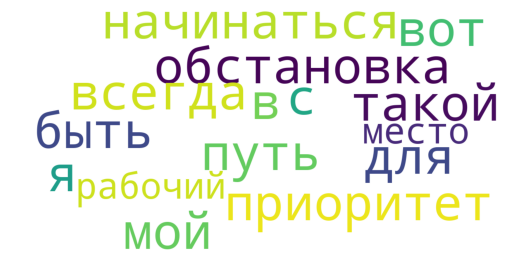

In [18]:
%%time
wordcloud = WordCloud(background_color='white',max_words=100,
                      max_font_size=40,
                      scale=3,
                      random_state=1).generate(reactions[4][3])
plt.axis('off')
plt.imshow(wordcloud)

## Векторизация текстов

In [45]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

Стоп слова

In [61]:
Stop_Words = list(set(stopwords.words('russian')))
#print(stop_words)

In [62]:
tfidf = TfidfVectorizer(stop_words=Stop_Words, min_df=10, max_df=0.9)

In [70]:
posts.fillna('БЕЗ_ТЕКСТА')

,0,1,2,3,4,5,6,7,8,9
nurlan-isbulaev-34bb211a3,сервисов на базе ии которые помогут прокачать ...,если вы в поисках удаленной работы или дополни...,как ваш профиль виден со стороны рекрутеров на...,𝗦𝗤𝗟 𝗭𝗲𝗿𝗼 𝘁𝗼 𝗛𝗲𝗿𝗼 𝘄𝗶𝘁𝗵 𝗠𝗶𝗻𝗱𝗺𝗮𝗽,,𝐉𝐨𝐢𝐧 𝐦𝐲 𝐓𝐞𝐥𝐞𝐠𝐫𝐚𝐦 𝐂𝐡𝐚𝐧𝐧𝐞𝐥 𝐟𝐨𝐫 𝐟𝐫𝐞𝐞 𝐫𝐞𝐬𝐨𝐮𝐫𝐜𝐞𝐬 𝗙𝗼...,землетрясения напомнили кто мы мы все маленьки...,с момента начала моей работы в компании доброз...,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА
maria-terenteva,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА
руслан-гусейнов-091858186,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА
kirill-gonin,всем привет собеседование на английском языке ...,я только что получил а значок за навык кто хоч...,я только что получил а значок за навык кто хоч...,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА
alexey-sergienko,я только что получил а значок за навык разрабо...,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА
...,...,...,...,...,...,...,...,...,...,...
d-batmanov,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА
ideyniy,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА
andreysimfi,всем привет нахожусь в поиске своей команды ос...,в нашей разработке мы используем но часто для ...,в предыдущей статье использование в мы рассмат...,в статье менеджеры библиотек мы рассматривали ...,в проекте необходимо реализовать дату в виде г...,недавно вышла давайте обновим систему систему ...,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА
chernyy-dmitriy-5129451a1,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА,БЕЗ_ТЕКСТА


In [75]:
X = tfidf.fit_transform(posts.fillna('БЕЗ_ТЕКСТА')[0])
X

<371x22 sparse matrix of type '<class 'numpy.float64'>'
	with 584 stored elements in Compressed Sparse Row format>

In [84]:
id2word = {i: token for i, token in enumerate(tfidf.get_feature_names_out())}

In [76]:
text_df = pd.DataFrame.sparse.from_spmatrix(X, columns = tfidf.get_feature_names_out())
text_df

,без_текста,благодарю,буду,вашу,возможности,всем,заранее,здравствуйте,карьерной,контактов,...,новой,поддержку,поиске,предложить,привет,признателен,работу,рекомендации,советы,это
0,0.0,0.0,0.413022,0.0,0.438816,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.457789,0.489552
1,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.000000,0.570339,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.580824,0.0,0.0,0.0,0.000000,0.580824
4,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
367,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
368,0.0,0.0,0.000000,0.0,0.000000,0.587909,0.0,0.0,0.0,0.0,...,0.0,0.0,0.543968,0.0,0.598717,0.0,0.0,0.0,0.000000,0.000000
369,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [86]:
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=31)
topics = lda.fit_transform(X)
topics.shape

(371, 5)

In [79]:
import numpy as np

In [87]:
for i in range(n_topics):
    c = lda.components_[i, :]
    topic_tokens = [id2word.get(token_id) for token_id in np.argsort(c)[-20:]]
    print("Тема",i+1, ":")
    print(", ".join(topic_tokens))
    print("\n ")

Тема 1 :
контактов, возможности, благодарю, вашу, новой, заранее, советы, карьерной, без_текста, работу, признателен, рекомендации, предложить, можете, которые, поддержку, поиске, привет, всем, буду

 
Тема 2 :
вашу, рекомендации, признателен, предложить, поиске, контактов, заранее, поддержку, советы, карьерной, можете, которые, это, без_текста, всем, возможности, привет, буду, новой, работу

 
Тема 3 :
вашу, работу, это, признателен, рекомендации, предложить, поиске, новой, контактов, заранее, поддержку, всем, советы, привет, карьерной, возможности, буду, можете, которые, без_текста

 
Тема 4 :
без_текста, всем, привет, буду, здравствуйте, новой, поиске, которые, заранее, поддержку, советы, карьерной, благодарю, вашу, можете, предложить, рекомендации, признателен, контактов, возможности

 
Тема 5 :
вашу, признателен, рекомендации, предложить, новой, контактов, поиске, поддержку, без_текста, работу, карьерной, можете, советы, буду, заранее, возможности, всем, привет, которые, это

 
